In [1]:
# Importing required Libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Dataset
df=pd.read_csv('../Terrorism/globalterrorismdb_0718dist.csv')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,0,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,-9,-9,1,1,NaN,NaN,NaN,NaN,NaN,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,-9,-9,1,1,NaN,NaN,NaN,NaN,NaN,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,-9,-9,1,1,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Features of Dataset
print(df.columns)

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related', 'Unnamed: 135',
       'Unnamed: 136', 'Unnamed: 137', 'Unnamed: 138', 'Unnamed: 139'],
      dtype='object', length=140)


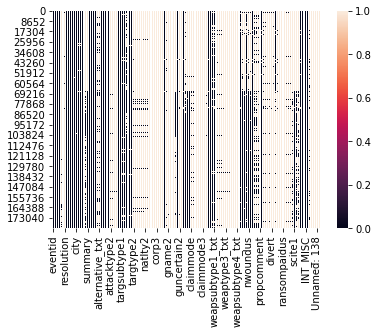

In [4]:
# Heatmap of Missing Value
sns.heatmap(df.isnull())
plt.show()

In [5]:
#Value count of Region
df.region_txt.value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: region_txt, dtype: int64

<Figure size 432x432 with 0 Axes>

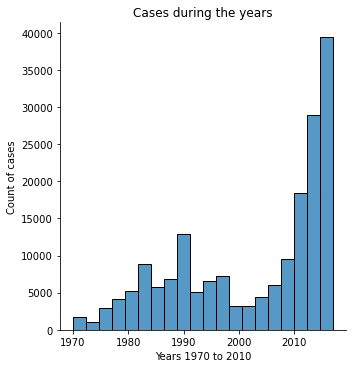

In [6]:
# Cases during the Years
plt.figure(figsize=(6,6))
sns.displot(df.iyear,bins=20)
plt.title('Cases during the years')
plt.xlabel('Years 1970 to 2010')
plt.ylabel('Count of cases')
plt.show()

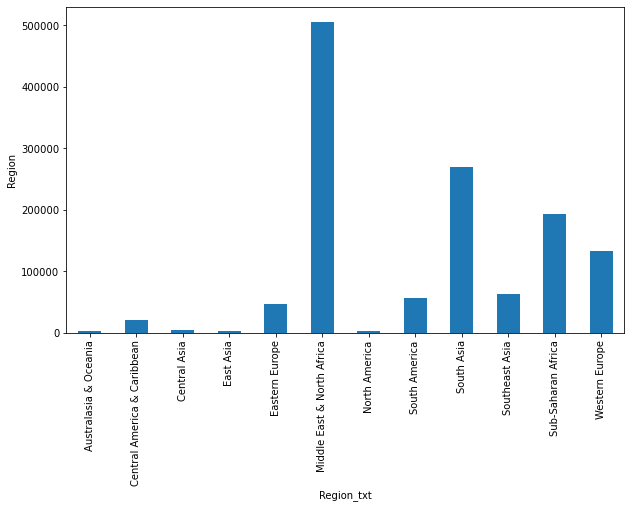

In [7]:
# Region_Txt Vs Region
plt.figure(figsize=(10,6))
groups=df.groupby(['region_txt'])['region'].sum()
groups.plot.bar()
plt.xlabel('Region_txt')
plt.ylabel('Region')
plt.show()

#### From the visuals we can find that major terrorism happened in Middle East and North Africa followed by South Asia and Sub-Saharan Africa

In [8]:
# Attack type 1 as per Region and Country
Attack_region=pd.pivot_table(data=df,
                             values='attacktype1',
                             index=['region_txt','country_txt'],
                             aggfunc=[np.sum,np.mean],
                             fill_value=0)
print(Attack_region)

                                                 sum        mean
                                         attacktype1 attacktype1
region_txt            country_txt                               
Australasia & Oceania Australia                  522    4.578947
                      Fiji                        86    5.058824
                      French Polynesia            22    7.333333
                      New Caledonia              113    3.645161
                      New Hebrides                 3    3.000000
...                                              ...         ...
Western Europe        Sweden                     648    4.909091
                      Switzerland                379    3.414414
                      United Kingdom           15005    2.866285
                      Vatican City                 1    1.000000
                      West Germany (FRG)        2146    3.966728

[205 rows x 2 columns]


In [9]:
# Attacks in Australasia & Oceania - Total and Average 
Attack_region.query('region_txt==["Australasia & Oceania"]')

sum        mean
                                        attacktype1 attacktype1
region_txt            country_txt                              
Australasia & Oceania Australia                 522    4.578947
                      Fiji                       86    5.058824
                      French Polynesia           22    7.333333
                      New Caledonia             113    3.645161
                      New Hebrides                3    3.000000
                      New Zealand               116    5.800000
                      Papua New Guinea          324    3.640449
                      Solomon Islands             8    2.000000
                      Vanuatu                    11    5.500000
                      Wallis and Futuna           7    7.000000

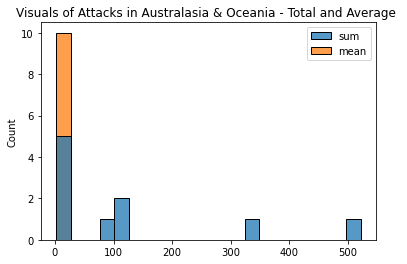

In [10]:
# Visuals of Attacks in Australasia & Oceania - Total and Average 
sns.histplot(Attack_region.query('region_txt==["Australasia & Oceania"]'))
plt.title('Visuals of Attacks in Australasia & Oceania - Total and Average ')
plt.show()

In [11]:
# Attacks in South Asia - Total and Average 
Attack_region.query('region_txt==["South Asia"]')

sum        mean
                       attacktype1 attacktype1
region_txt country_txt                        
South Asia Afghanistan       45303    3.558479
           Bangladesh         6050    3.671117
           Bhutan               21    3.500000
           India             40475    3.384197
           Maldives            107    4.863636
           Mauritius             2    1.000000
           Nepal              4447    3.660082
           Pakistan          41970    2.921075
           Sri Lanka          9113    3.015553

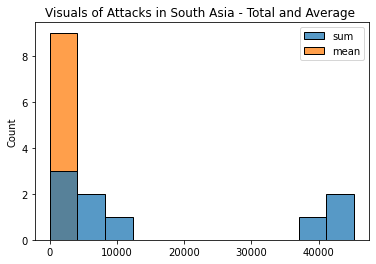

In [12]:
# Visuals of Attacks in South Asia - Total and Average 
sns.histplot(Attack_region.query('region_txt==["South Asia"]'))
plt.title('Visuals of Attacks in South Asia - Total and Average ')
plt.show()

In [13]:
# Attacks in South Asia country India - Total and Average 
Attack_region.query('country_txt==["India"]')

,,sum,mean
,,attacktype1,attacktype1
region_txt,country_txt,,
South Asia,India,40475,3.384197


In [14]:
# Attacks in Middle East & North Africa - Total and Average 
Attack_region.query('region_txt==["Middle East & North Africa"]')

sum        mean
                                                    attacktype1 attacktype1
region_txt                 country_txt                                     
Middle East & North Africa Algeria                         7411    2.701786
                           Bahrain                          760    3.671498
                           Egypt                           7171    2.892699
                           International                      3    3.000000
                           Iran                            2122    3.102339
                           Iraq                           76276    3.096119
                           Israel                          6526    2.989464
                           Jordan                           355    3.141593
                           Kuwait                           260    3.421053
                           Lebanon                         7260    2.929782
                           Libya                           8416    3.742108
                           Morocco                          141    3.916667
                           North Yemen                       10    1.666667
                           Qatar                             29    4.142857
                           Saudi Arabia                    1119    3.016173
                           South Yemen                        7    3.500000
                           Syria                           7917    3.597001
                           Tunisia                          351    3.220183
                           Turkey                         13197    3.074790
                           United Arab Emirates              59    2.681818
                           West Bank and Gaza Strip        6603    2.964975
                           Western Sahara                    21    4.200000
                           Yemen                          12222    3.651628

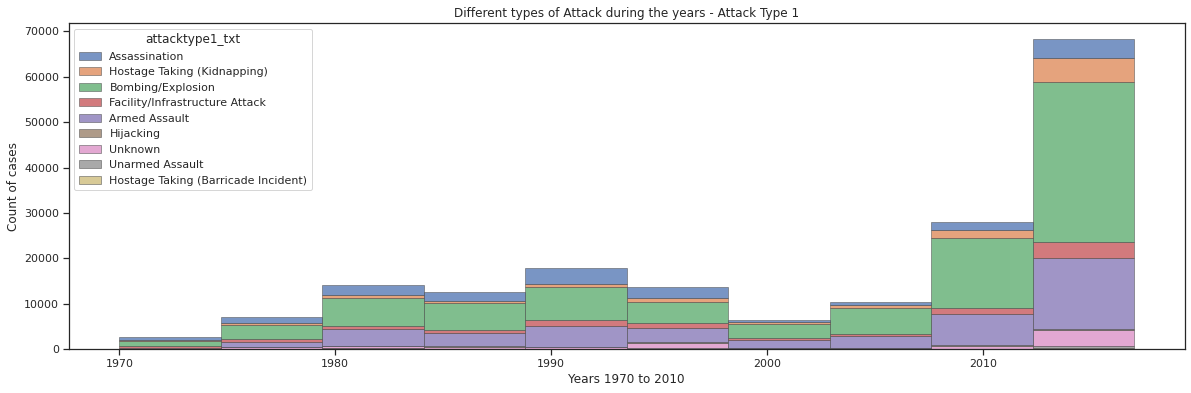

In [15]:
# Different types of attack during the years -Attack type 1
sns.set_theme(style="ticks")
plt.figure(figsize=(20,6))
sns.histplot(data=df,
             x='iyear',
             bins=10,
             multiple="stack",
             #palette="light:m_r",
             edgecolor=".3",
             linewidth=.5,
             #log_scale=True,
             hue='attacktype1_txt'
            )
plt.title('Different types of Attack during the years - Attack Type 1')
plt.xlabel('Years 1970 to 2010')
plt.ylabel('Count of cases')
plt.show()

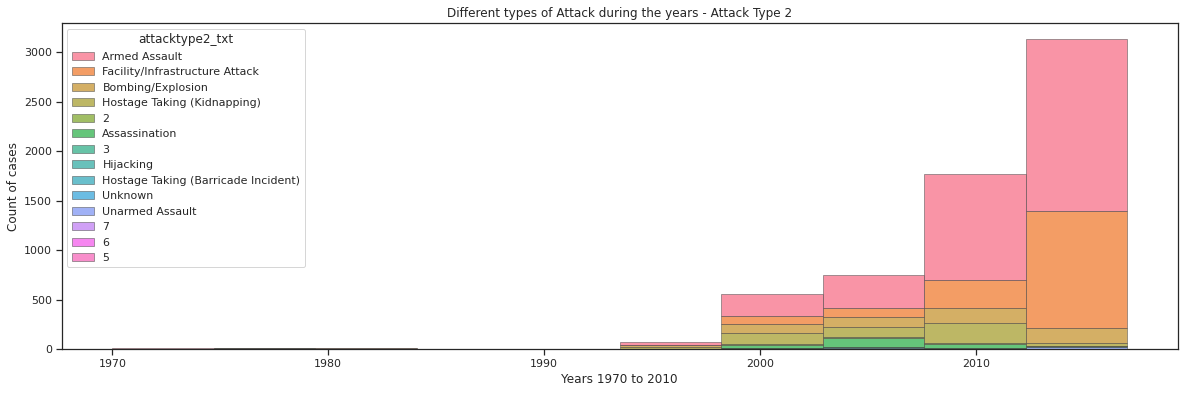

In [16]:
# Different types of attack during the years - Attack type 2
sns.set_theme(style="ticks")
plt.figure(figsize=(20,6))
sns.histplot(data=df,
             x='iyear',
             bins=10,
             multiple="stack",
             #palette="light:m_r",
             edgecolor=".3",
             linewidth=.5,
             #log_scale=True,
             hue='attacktype2_txt'
            )
plt.title('Different types of Attack during the years - Attack Type 2')
plt.xlabel('Years 1970 to 2010')
plt.ylabel('Count of cases')
plt.show()

#### From the above visuals we found that the maximum attacks happened in the year during 2010. During the year attacks were majorly due to Bombing/Explosion and next was due to Armed assualt.

<Figure size 720x432 with 0 Axes>

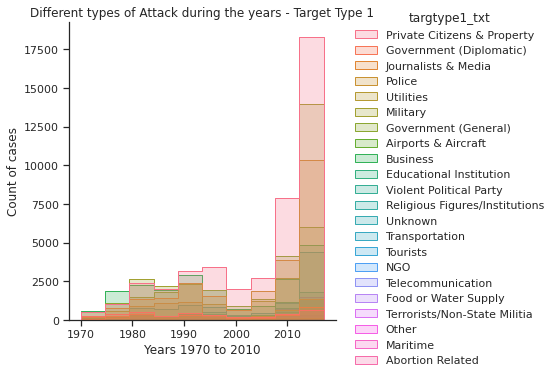

In [17]:
# Different types of attack during the years - Attack type 2
#sns.set_theme(style="ticks")
plt.figure(figsize=(10,6))
sns.displot(data=df,
             x='iyear',
             bins=10,
             #multiple="stack",
             #palette="light:m_r",
             #edgecolor=".3",
             #linewidth=.5,
             #log_scale=True,
             hue='targtype1_txt',
            element='step')

plt.title('Different types of Attack during the years - Target Type 1')
plt.xlabel('Years 1970 to 2010')
plt.ylabel('Count of cases')
plt.show()

#### From above visuals it was found that main tagets were Private Citizens & property followed by Governement diplomatic, Journalists and Media and so on as mentioned

#### In the conclusion, major cases started evolving from 1970 however sudden increased during 2010 in Middle East and North Africa followed by South Asia and Sub-Saharan Africa and targets were Private Citizens & property followed by Governement diplomatic, Journalists and Media.